In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## Import Oil Dataset in DataFrame

In [2]:
oil_df = pd.read_csv('model_data.csv')
oil_df

,Unnamed: 0,WTI,BRENT,ARAB_LIGHT,RIGS,FUEL_CONS,USA_OIL
0,1,22.69,20.50,19.73,514,100.859751,11.311850
1,2,21.55,19.20,18.71,492,100.248437,11.264940
2,3,20.34,17.95,16.76,478,99.413921,11.085530
3,4,18.50,16.35,14.86,484,100.126514,11.155130
4,5,17.47,15.30,14.72,493,99.861039,11.027760
...,...,...,...,...,...,...,...
361,362,44.83,51.31,52.48,678,68.295183,7.327776
362,363,20.51,14.85,24.14,663,68.269186,7.437338
363,364,19.23,18.11,22.30,471,66.229312,7.367632
364,365,35.57,34.15,31.84,267,66.664741,7.316165


# Step 1: Univariate Linear Regressions Predicting Oil Price

## Step 1a) Predicting WTI Oil Price from the Number of Rigs

In [3]:
X = oil_df[["RIGS"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Single Predictor (Number of Rigs) Training Score R2:{training_score}")
print(f"WTI Oil Single Predictor (Number of Rigs) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Single Predictor (Number of Rigs) Training Score R2:0.4160317643332272
WTI Oil Single Predictor (Number of Rigs) Testing Score R2: 0.3420132037667333
WTI Oil Model MSE: 0.6402515223320081


##  Step 1b) Predicting BRENT Oil Price from the Number of Rigs

In [5]:
X = oil_df[["RIGS"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [6]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Single Predictor (Number of Rigs) Training Score R2:{training_score}")
print(f"BRENT Oil Single Predictor (Number of Rigs) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Single Predictor (Number of Rigs) Training Score R2:0.5029417433099234
BRENT Oil Single Predictor (Number of Rigs) Testing Score R2: 0.42732837288995895
BRENT Oil Model MSE: 0.5462568848933652


##  Step 1c) Predicting ARAB LIGHT Oil Price from the Number of Rigs

In [7]:
X = oil_df[["RIGS"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [8]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil Single Predictor (Number of Rigs) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Single Predictor (Number of Rigs) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Single Predictor (Number of Rigs) Training Score R2:0.50413428540349
ARAB LIGHT Oil Single Predictor (Number of Rigs) Testing Score R2: 0.44143797213536584
ARAB LIGHT Oil Model MSE: 0.4997081324748195


##  Step 1d) Predicting WTI Oil Price from Fuel Consumption

In [9]:
X = oil_df[["FUEL_CONS"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [10]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Single Predictor (Fuel Consumption) Training Score R2:{training_score}")
print(f"WTI Oil Single Predictor (Fuel Consumption) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Single Predictor (Fuel Consumption) Training Score R2:0.4310409778980112
WTI Oil Single Predictor (Fuel Consumption) Testing Score R2: 0.4430209928182891
WTI Oil Model MSE: 0.5419662815371119


##  Step 1e) Predicting BRENT Oil Price from Fuel Consumption

In [11]:
X = oil_df[["FUEL_CONS"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [12]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Single Predictor (Fuel Consumption) Training Score R2:{training_score}")
print(f"BRENT Oil Single Predictor (Fuel Consumption) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Single Predictor (Fuel Consumption) Training Score R2:0.45204273395532024
BRENT Oil Single Predictor (Fuel Consumption) Testing Score R2: 0.47037474173289195
BRENT Oil Model MSE: 0.5051960496136858


##  Step 1f) Predicting ARAB LIGHT Oil Price from Fuel Consumption

In [13]:
X = oil_df[["FUEL_CONS"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [14]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil Single Predictor (Fuel Consumption) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Single Predictor (Fuel Consumption) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Single Predictor (Fuel Consumption) Training Score R2:0.4579732097827405
ARAB LIGHT Oil Single Predictor (Fuel Consumption) Testing Score R2: 0.49174429328756464
ARAB LIGHT Oil Model MSE: 0.45470242757442114


##  Step 1g) Predicting WTI Oil Price from USA Oil Production

In [15]:
X = oil_df[["USA_OIL"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [16]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Single Predictor (USA Oil Production) Training Score R2:{training_score}")
print(f"WTI Oil Single Predictor (USA Oil Production) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Single Predictor (USA Oil Production) Training Score R2:0.23515457011198848
WTI Oil Single Predictor (USA Oil Production) Testing Score R2: 0.370525231810632
WTI Oil Model MSE: 0.6125080030632606


##  Step 1h) Predicting BRENT Oil Price from USA Oil Production

In [17]:
X = oil_df[["USA_OIL"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [18]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Single Predictor (USA Oil Production) Training Score R2:{training_score}")
print(f"BRENT Oil Single Predictor (USA Oil Production) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Single Predictor (USA Oil Production) Training Score R2:0.20770985198309788
BRENT Oil Single Predictor (USA Oil Production) Testing Score R2: 0.34744130927416883
BRENT Oil Model MSE: 0.6224591209536026


##  Step 1i) Predicting ARAB LIGHT Oil Price from USA Oil Production

In [19]:
X = oil_df[["USA_OIL"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 1) (366, 1)


In [20]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil Single Predictor (USA Oil Production) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Single Predictor (USA Oil Production) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Single Predictor (USA Oil Production) Training Score R2:0.21199948751233977
ARAB LIGHT Oil Single Predictor (USA Oil Production) Testing Score R2: 0.35262369464613186
ARAB LIGHT Oil Model MSE: 0.5791643334466499


##  Step 1 Conclusion: Univariate Linear Regression (Models with Single Predictor):
### The accuracy scores for our models with single predictors are poor (R2 testing scores ranging from 0.34 to 0.49. We will explore models including 2 and 3 predictors simultaneously using multiple linear regressions

# Step 2: Multiple Linear Regressions (2 Predictors) Predicting Oil Price

##  Step 2a) Predicting WTI Oil Price from the Number of Rigs and Fuel Consumption

In [21]:
X = oil_df[["RIGS", "FUEL_CONS"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [22]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:{training_score}")
print(f"WTI Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:0.5518974982392305
WTI Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: 0.503789584904816
WTI Oil Model MSE: 0.4828356366425622


##  Step 2b) Predicting WTI Oil Price from the Number of Rigs and USA Oil Production

In [23]:
X = oil_df[["RIGS", "USA_OIL"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [24]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:{training_score}")
print(f"WTI Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:0.642175800252509
WTI Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: 0.6513048570086506
WTI Oil Model MSE: 0.33929646826961873


##  Step 2c) Predicting WTI Oil Price from Fuel Consumption and USA Oil Production

In [25]:
X = oil_df[["FUEL_CONS", "USA_OIL"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [26]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Two Predictors (Fuel Consumption and USA Oil Production) Training Score R2:{training_score}")
print(f"WTI Oil Two Predictors (Fuel Consumption and USA Oil Production) Testing Score R2: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")

WTI Oil Two Predictors (Fuel Consumption and USA Oil Production) Training Score R2:0.4509155778559111
WTI Oil Two Predictors (Fuel Consumption and USA Oil Production) Testing Score R2: 0.49210026038877763
WTI Oil Model MSE: 0.49420988892128603


##  Step 2d) Predicting BRENT Oil Price from Number of Rigs and Fuel Consumption 

In [27]:
X = oil_df[["RIGS", "FUEL_CONS"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [28]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:{training_score}")
print(f"BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:0.6231111441154837
BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: 0.570670930520619
BRENT Oil Model MSE: 0.40952606866781116


##  Step 2e) Predicting BRENT Oil Price from Number of Rigs and USA Oil Production

In [29]:
X = oil_df[["RIGS", "USA_OIL"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [30]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:{training_score}")
print(f"BRENT Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:0.7013486340215016
BRENT Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: 0.7068545311272456
BRENT Oil Model MSE: 0.27962399928059584


##  Step 2f) Predicting BRENT Oil Price from Fuel Consumption and USA Oil Production

In [31]:
X = oil_df[["FUEL_CONS", "USA_OIL"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [32]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:{training_score}")
print(f"BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")

BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:0.4610739312496632
BRENT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: 0.5001284644011448
BRENT Oil Model MSE: 0.47681473108955746


##  Step 2g) Predicting ARAB LIGHT Oil Price from Number of Rigs and Fuel Consumption

In [33]:
X = oil_df[["RIGS", "FUEL_CONS"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [34]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Two Predictors (Number of Rigs and Fuel Consumption) Training Score R2:0.6275642267459594
ARAB LIGHT Oil Two Predictors (Number of Rigs and Fuel Consumption) Testing Score R2: 0.5937433111359771
ARAB LIGHT Oil Model MSE: 0.3634507201890271


##  Step 2h) Predicting ARAB LIGHT Oil Price from Number of Rigs and USA Oil Production


In [35]:
X = oil_df[["RIGS", "USA_OIL"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [36]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)

print(f"ARAB LIGHT Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Two Predictors (Number of Rigs and USA Oil Production) Training Score R2:0.7067235330113115
ARAB LIGHT Oil Two Predictors (Number of Rigs and USA Oil Production) Testing Score R2: 0.7239447252354152
ARAB LIGHT Oil Model MSE: 0.24696821289445917


##  Step 2i) Predicting ARAB LIGHT Oil Price from Fuel Consumption and USA Oil Production

In [37]:
X = oil_df[["FUEL_CONS", "USA_OIL"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 2) (366, 1)


In [38]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)

print(f"ARAB LIGHT Oil Two Predictors (Fuel Consumption and USA Oil Production) Training Score R2:{training_score}")
print(f"ARAB LIGHT Oil Two Predictors (Fuel Consumption  and USA Oil Production) Testing Score R2: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")

ARAB LIGHT Oil Two Predictors (Fuel Consumption and USA Oil Production) Training Score R2:0.4675204483048643
ARAB LIGHT Oil Two Predictors (Fuel Consumption  and USA Oil Production) Testing Score R2: 0.5204226890598074
ARAB LIGHT Oil Model MSE: 0.42904578269201216


##  Step 2 Conclusion: Multivariate Linear Regressions (Models with Two Predictors):
### The accuracy scores for our models with two predictors are improved relative to the single predictors (R2 testing scores ranging from 0.49 to 0.49. We will explore models including all 3 predictors simultaneously using multiple linear regressions

# Step 3: Multiple Linear Regressions (all 3 Predictors Simultaneously) Predicting Oil Price

## Step 3a) Predicting WTI Oil Price from Number of Rigs, Fuel Consumption and USA Oil Production

In [39]:
# Assign the data to X and y

X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)


(366, 3) (366, 1)


In [40]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: {training_score}")
print(f"WTI Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:{testing_score}")
print(f"WTI Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: {MSE}")


WTI Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: 0.6479149966237274
WTI Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:0.6467532036602849
WTI Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: 0.34372543706063624


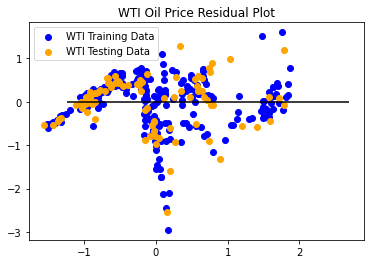

In [41]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="WTI Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="WTI Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("WTI Oil Price Residual Plot")
plt.show()

## Step 3b) Predicting BRENT Oil Price from Number of Rigs, Fuel Consumption and USA Oil Production

In [42]:
# Assign the data to X and y

X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 3) (366, 1)


In [43]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: {training_score}")
print(f"BRENT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:{testing_score}")
print(f"BRENT Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: {MSE}")


BRENT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: 0.7066499798450274
BRENT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:0.7017482899724101
BRENT Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: 0.28449471271340704


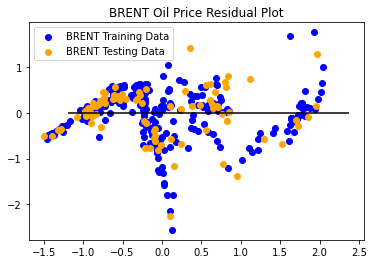

In [44]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="BRENT Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="BRENT Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("BRENT Oil Price Residual Plot")
plt.show()

## Step 3c) Predicting ARAB LIGHT Oil Price from Number of Rigs, Fuel Consumption and USA Oil Production

In [45]:
X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 3) (366, 1)


In [46]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: {training_score}")
print(f"ARAB LIGHT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:{testing_score}")
print(f"ARAB LIGHT Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: {MSE}")


ARAB LIGHT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Training Score R2: 0.7123403322651868
ARAB LIGHT Oil All Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) Testing Score R2:0.7202569259370255
ARAB LIGHT Oil  Three Predictors (Number of Rigs, Fuel Consumption, and USA Oil Production) MSE: 0.2502674405691103


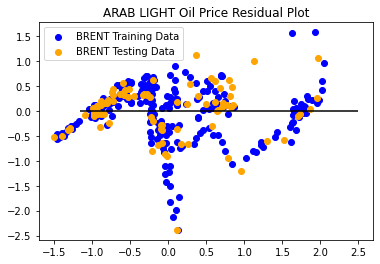

In [47]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="BRENT Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="BRENT Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("ARAB LIGHT Oil Price Residual Plot")
plt.show()

##  Step 3 Conclusion: Multivariate Linear Regressions (Models with all three Predictors):
### The accuracy scores for our models with all three predictors are the best relative to the models with one or two predictors. Our R2 testing scores for the models with all 3 predictors range from 0.65 to 0.72. 

# Overall Conclusion: Including all 3 predictors in our models simultaneously leads to the best fitting models.